# Студенты с курсами и без них

Есть 2 группы студентов одна их которых ходила на подготовительные курсы, другая нет.
Нужно понять повлияло ли посещение курсов на балл студентов.

Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import scipy.stats as st

Рассмотрим данные

In [2]:
df_before = pd.read_csv('student_before_score.csv')

In [3]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   student_id    1000 non-null   int64
 1   before_score  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [4]:
df_before.head(5)

,student_id,before_score
0,1,75
1,2,81
2,3,58
3,4,47
4,5,76


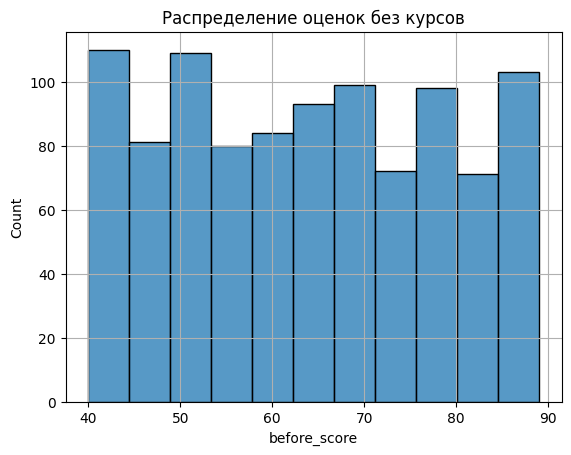

In [5]:
sns.histplot(df_before['before_score'])
plt.grid(True)
plt.title('Распределение оценок без курсов')
None

In [6]:
df_after = pd.read_csv('student_after_score.csv')

In [7]:
df_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   1000 non-null   int64
 1   after_score  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [8]:
df_after.head(5)

,student_id,after_score
0,1,92
1,2,79
2,3,92
3,4,90
4,5,98


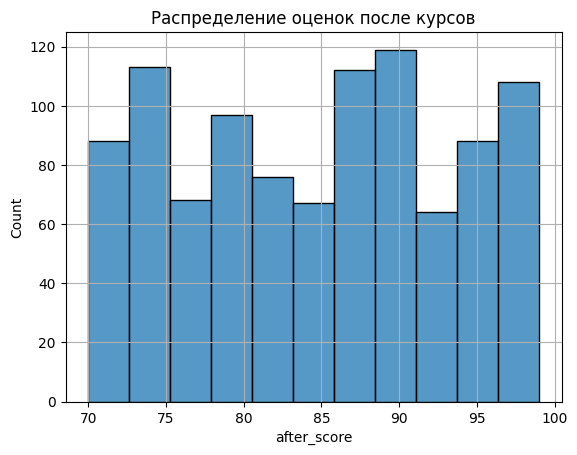

In [9]:
sns.histplot(df_after['after_score'])
plt.grid(True)
plt.title('Распределение оценок после курсов')
None

## Независимые группы.

Нулевая гипотеза: средние значения оценок студентов из двух групп равны.
Альтернативная гипотеза: среднее значение оценок студентов после курсов больше

In [10]:
results = st.ttest_ind(df_after['after_score'], df_before['before_score'], alternative='greater')

print(f'p-value: {results.pvalue}')

p-value: 3.6845605058580334e-244


p-value близко к нулю, определённо, оценки после курсов выше.

## Зависимые группы.

В случае если имеется в виду оценки одних студентов до и после курсов.

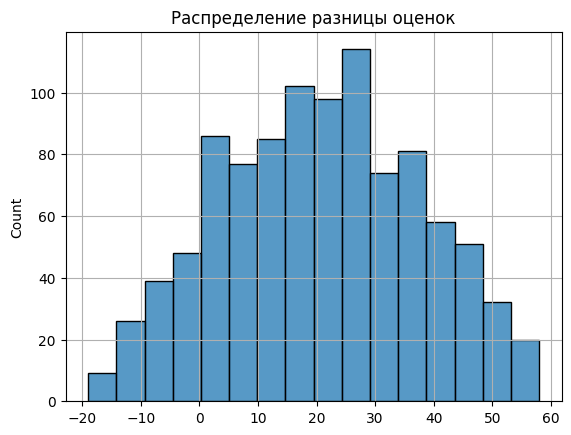

In [11]:
sns.histplot(df_after['after_score'] - df_before['before_score'])
plt.grid(True)
plt.title('Распределение разницы оценок')
None

Нулевая гипотеза: средние значения оценок студентов до и после курсов равны.
Альтернативная гипотеза: среднее значение оценок студентов до и после курсов не равны.

In [12]:
results = st.ttest_rel(df_before['before_score'], df_after['after_score'])
print('p-значение:', results.pvalue)

p-значение: 2.80891949404603e-202


p-value близко к нулю, определённо, оценки после курсов выше. Это же подтверждается графиком

## Вывод
Определённо, оценки студентов после курсов выше